<a href="https://colab.research.google.com/github/MuntahaZaigham1/ds_assign2/blob/master/ds_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [0]:
def load_data(path, header):
    marks_df = pd.read_csv(path,delimiter='\t', header=header)
    return marks_df

In [115]:

if __name__ == "__main__":
    # load the data from the file
    data = load_data("/content/marks.txt", None)

TypeError: ignored

In [0]:
 # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

In [19]:
print(X)
print(y)


            0          1
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
..        ...        ...
95  83.489163  48.380286
96  42.261701  87.103851
97  99.315009  68.775409
98  55.340018  64.931938
99  74.775893  89.529813

[100 rows x 2 columns]
0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64


In [0]:
# filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

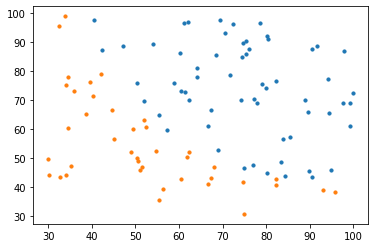

In [21]:
 # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Not Admitted')

In [0]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [23]:
model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)

The accuracy score using scikit-learn is 0.89
The model parameters using scikit learn
[[0.20535491 0.2005838 ]]


In [0]:
x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

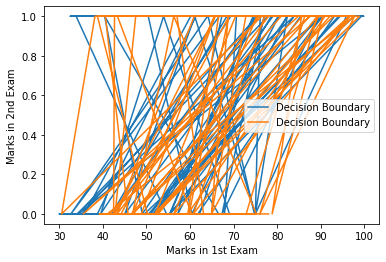

In [34]:
plt.plot(X, predicted_classes, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [0]:
if __name__ == "__main__":
    # load the data from the file
    iris_train = load_data("/content/IrisPetal.txt", None)

In [118]:
print(iris_train)


      0    1               2
0   1.4  0.2     Iris-setosa
1   1.4  0.2     Iris-setosa
2   1.3  0.2     Iris-setosa
3   1.5  0.2     Iris-setosa
4   1.4  0.2     Iris-setosa
..  ...  ...             ...
95  5.2  2.3  Iris-virginica
96  5.0  1.9  Iris-virginica
97  5.2  2.0  Iris-virginica
98  5.4  2.3  Iris-virginica
99  5.1  1.8  Iris-virginica

[100 rows x 3 columns]


In [125]:
#iris_train=iris_train[:100]
print(iris_train[2])
j=0
for x in iris_train[2]:
  if x == "Iris-setosa":
    x=0
  if x == "Iris-virginica":
    x=1
  
  iris_train[2][j]=x
  j=j+1

print(iris_train[2])

0        Iris-setosa
1        Iris-setosa
2        Iris-setosa
3        Iris-setosa
4        Iris-setosa
           ...      
95    Iris-virginica
96    Iris-virginica
97    Iris-virginica
98    Iris-virginica
99    Iris-virginica
Name: 2, Length: 100, dtype: object
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
import math

In [0]:
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0

# Alpha
a = 0.02

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z

for epoch in range(len(iris_train)):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    
    # Iterating through the Df and calculating all parameters:
    for row in iris_train.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[0]+ W2*row[1]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1)
        else:
            p_class = np.append(p_class,0)
     
    # The error in prediction
    error = p_pred_exps - iris_train[2]
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*iris_train[0]
    error_x2 = error*iris_train[1]
    
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    

# Adding the predicted class as a separate column to check for performance:
iris_train['pred_class']=p_class

# Check if any class has been mis classified 


In [127]:
print(iris_train)

      0    1  2  pred_class
0   1.4  0.2  0         0.0
1   1.4  0.2  0         0.0
2   1.3  0.2  0         0.0
3   1.5  0.2  0         0.0
4   1.4  0.2  0         0.0
..  ...  ... ..         ...
95  5.2  2.3  1         1.0
96  5.0  1.9  1         1.0
97  5.2  2.0  1         1.0
98  5.4  2.3  1         1.0
99  5.1  1.8  1         1.0

[100 rows x 4 columns]
